In [1]:
from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import easyocr
from matplotlib.path import Path as mplPath
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4080 SUPER'

In [9]:
#Images sourced from the internet for testing deployed model:
final_project = YOLO("char_weights.pt",task='detect')
image_files = ["tests/Test_Model_1.jpeg", "tests/Test_Model_2.jpeg", "tests/Test_Model_3.jpeg", 
               "tests/Test_Model_4.jpeg", "tests/Test_Model_5.jpeg", "tests/Test_Model_6.jpeg"]

In [4]:
def enhance_image(img):
    #function unused sincee it did not help to improve easyocr inference metrics
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    equ = cv2.equalizeHist(gray)
    blurred_img = cv2.GaussianBlur(equ, (5, 5), 0)
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    sharpened_img = cv2.filter2D(blurred_img, -1, kernel)
    return sharpened_img

In [3]:
def display_images(img, flag, rois=None, text=None, coordinates=None, color=(0,255,0), corners=None):
    if flag == 1:
        results = final_project(img)
        for i, r in enumerate(results):
            im_bgr = r.plot()
            im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
        
            plt.figure(figsize=(10, 10))
            plt.imshow(im_rgb)
            plt.axis('off')
            plt.show()
    elif flag == 0:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
    elif flag == 2 and rois is not None:
        for roi in rois:
            plt.figure(figsize=(10, 10))
            plt.imshow(roi)
            plt.axis('off')
            plt.show()
    elif flag == 4 and coordinates is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x1, y1, x2, y2 = coordinates
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
        if text is not None:
            cv2.putText(img_rgb, text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
    elif flag == 5 and corners is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.polylines(img_rgb, [corners], isClosed=True, color=color, thickness=2)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

In [5]:
def extract_rois(results, target_label="Placa"):
    rois = []
    coordinates = []
    for result in results:
        for box in result.boxes:
            if final_project.names[int(box.cls)] == target_label:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                roi = result.orig_img[y1:y2, x1:x2]
                rois.append(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                coordinates.append([x1,y1,x2,y2])
    return rois,coordinates

In [6]:
def is_car_on_crosswalk(car_box, crosswalk_corners):
    car_poly = np.array([[car_box[0], car_box[1]], [car_box[2], car_box[1]], [car_box[2], car_box[3]], [car_box[0], car_box[3]]])
    crosswalk_poly = np.array(crosswalk_corners)
    
    crosswalk_poly_path = mplPath(crosswalk_poly)
    for point in car_poly:
        if crosswalk_poly_path.contains_point(point):
            return True
    return False


image 1/1 /home/daguill/bird-eye/tests/Test_Model_1.jpeg: 384x640 (no detections), 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)


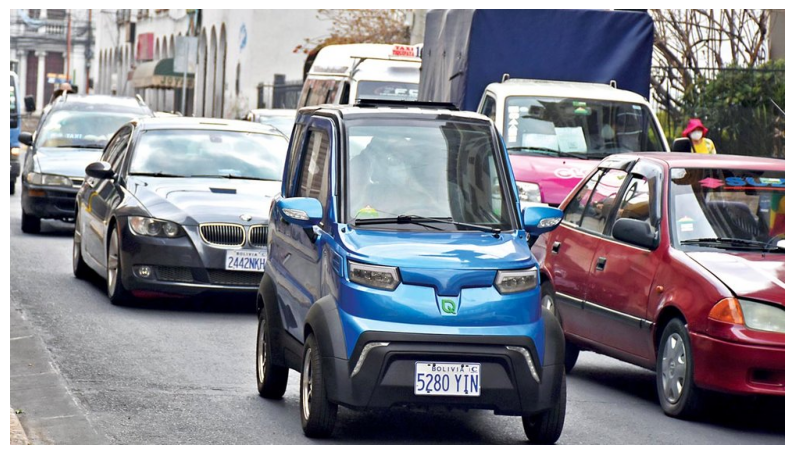


image 1/1 /home/daguill/bird-eye/tests/Test_Model_2.jpeg: 384x640 (no detections), 9.1ms
Speed: 0.8ms preprocess, 9.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


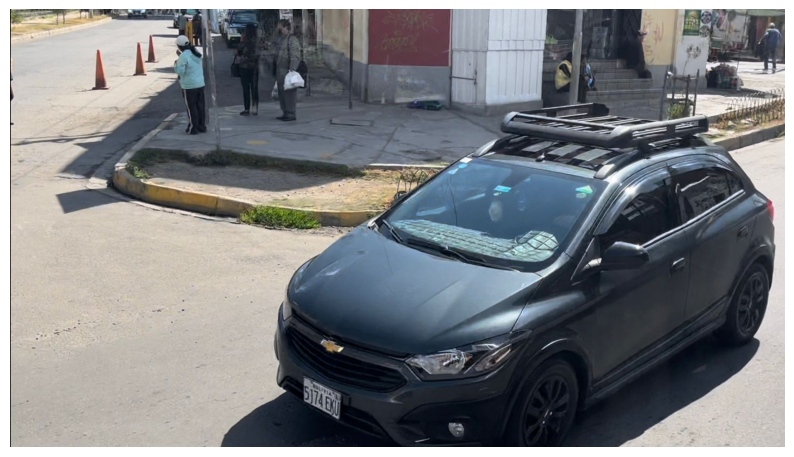


image 1/1 /home/daguill/bird-eye/tests/Test_Model_3.jpeg: 384x640 (no detections), 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


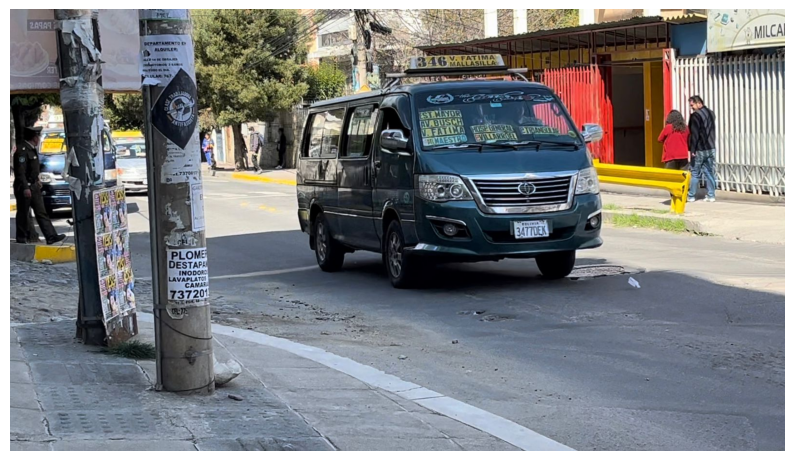


image 1/1 /home/daguill/bird-eye/tests/Test_Model_4.jpeg: 384x640 (no detections), 8.7ms
Speed: 1.0ms preprocess, 8.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


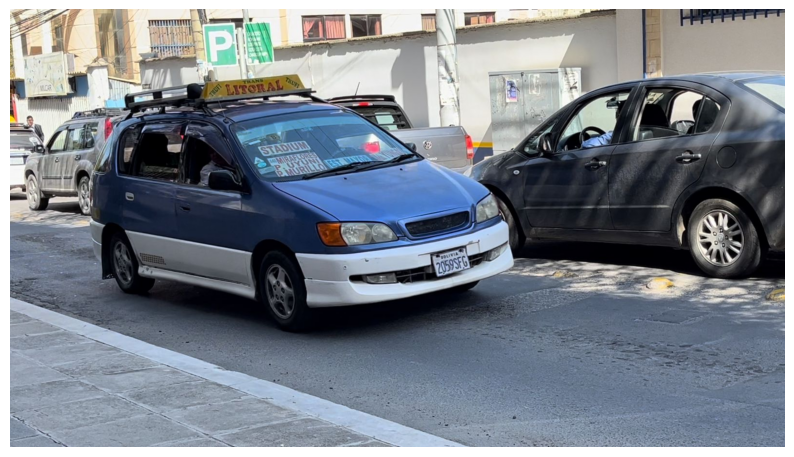


image 1/1 /home/daguill/bird-eye/tests/Test_Model_5.jpeg: 384x640 (no detections), 8.6ms
Speed: 0.9ms preprocess, 8.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


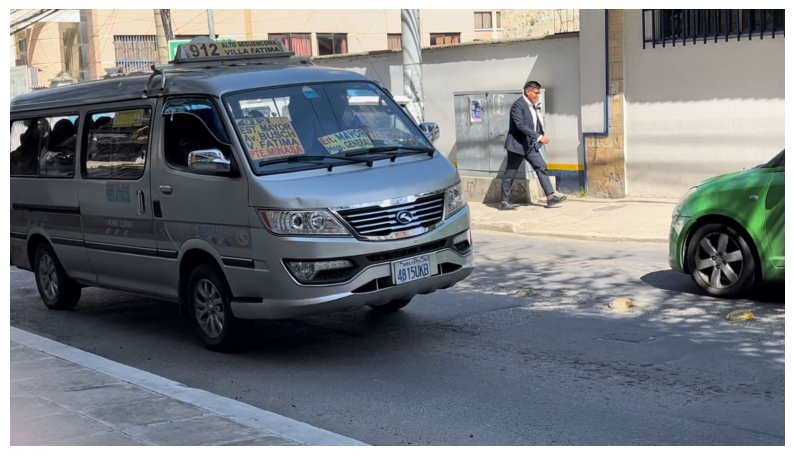


image 1/1 /home/daguill/bird-eye/tests/Test_Model_6.jpeg: 384x640 (no detections), 8.7ms
Speed: 1.0ms preprocess, 8.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


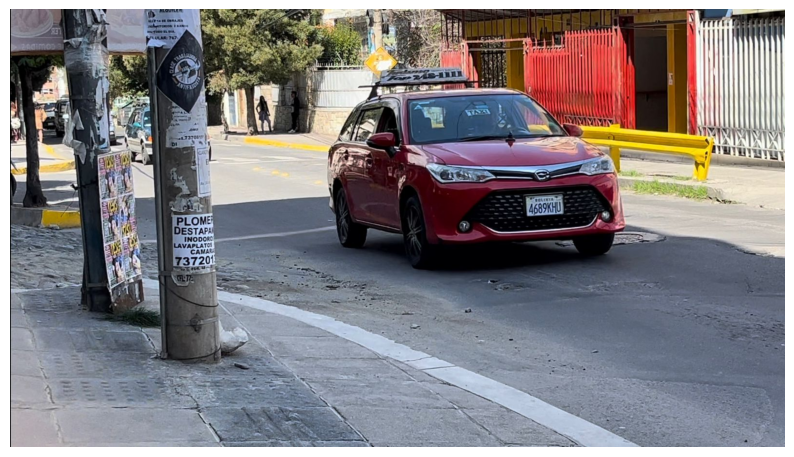

In [10]:
path='tests/'
image_files = image_files
for image_file in image_files:
    display_images(image_file,1)

In [12]:
test_img = cv2.imread("/home/daguill/bird-eye/tests/Test_Model_3.jpeg")

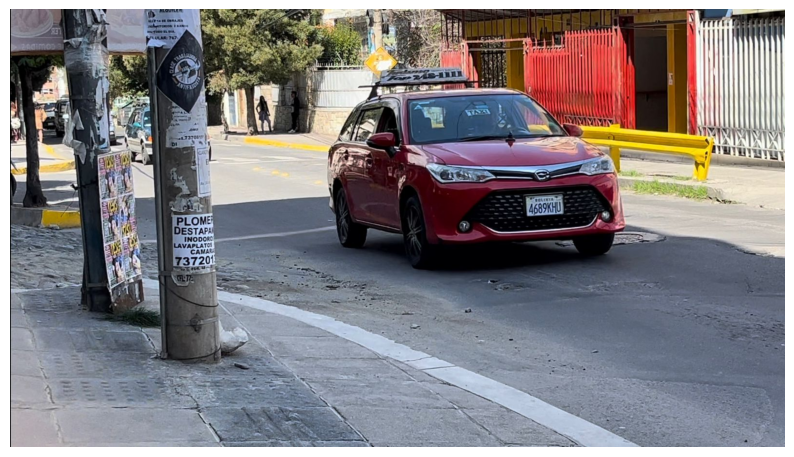


0: 384x640 (no detections), 10.1ms
Speed: 10.0ms preprocess, 10.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


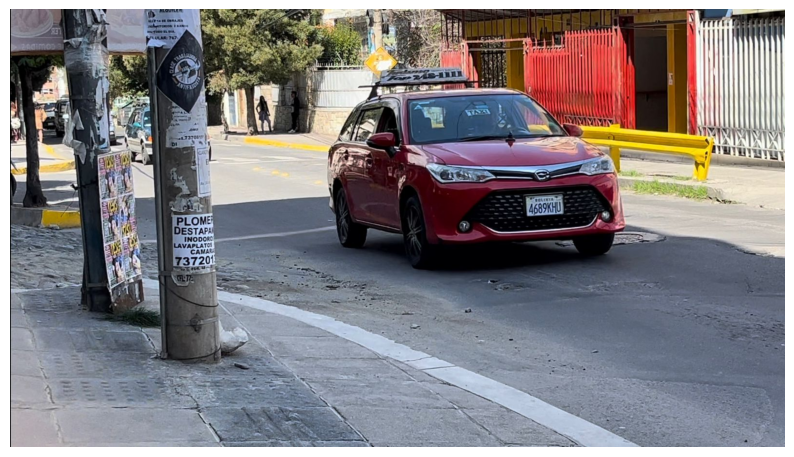


0: 384x640 (no detections), 9.1ms
Speed: 0.8ms preprocess, 9.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
#extracting ROI and reading the car plate
test_img = cv2.imread("/home/daguill/bird-eye/tests/Test_Model_6.jpeg")

display_images(test_img,0)
display_images(test_img,1)
rois,coord = extract_rois(final_project(test_img))
display_images(None, flag=2, rois=rois)

for roi, coord in zip(rois, coord):
    read = easyocr.Reader({'en'})
    lectura = read.readtext(roi)
    #first element in list are a set of 4 coordinates, second is the text itself and last is the inference metric
    print(lectura[0][1])
    display_images(test_img,4,text=lectura[0][1],coordinates=coord,color=(0,255,0))

Now that we have ensured that all of our modular functions work properly, we need to make sure to only register the plate in case that the car is parked on top of a crosswalk, for this purpose, we have assumed the camera to be static through time and the crosswalk also to be invariant, although this suppositions are partly true, for this project they will suffice.

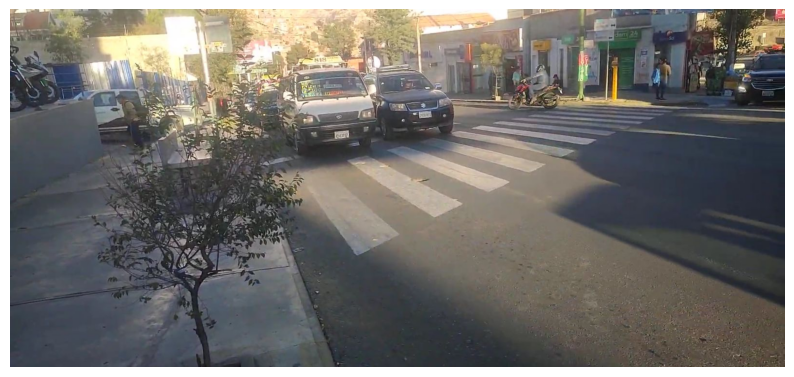

In [21]:
#given fixed view point for the following image:
path = 'C:/Users/auzag/Desktop/crosswalk_test/'
cross_img = cv2.imread(path+'3.jpeg')
display_images(cross_img,0)

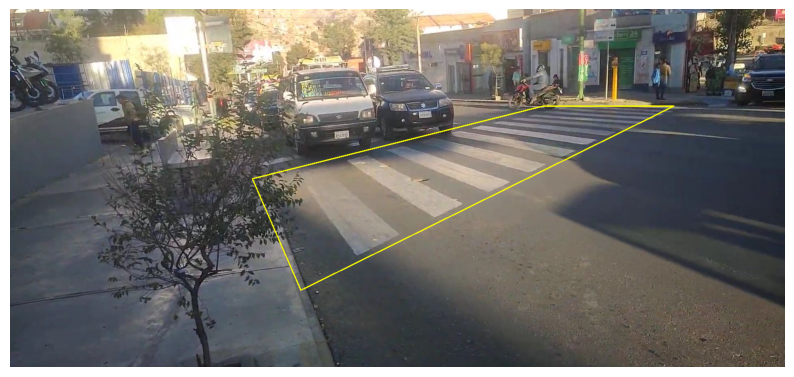

In [22]:
#A manual mask is drawn on top of the crosswalk to properly check if a car is on top of the crosswalk
crosswalk = np.array([[600, 580], [1370, 200], [1100, 200], [500, 350]])
display_images(cross_img,5,corners=crosswalk,color=(255,255,0))


0: 320x640 3 Autos, 2 Placas, 42.7ms
Speed: 3.6ms preprocess, 42.7ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)


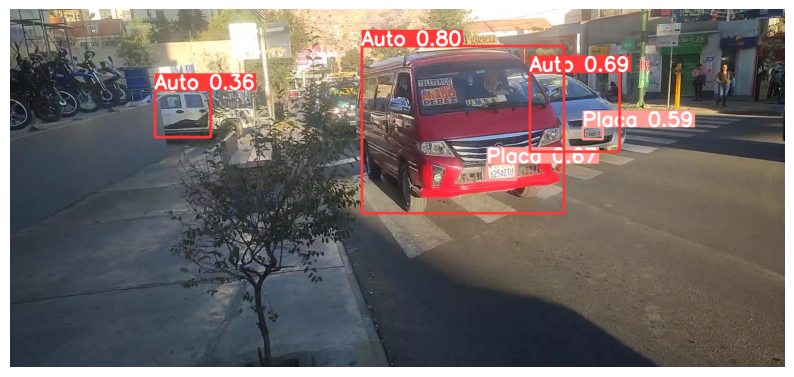


0: 320x640 3 Autos, 2 Placas, 42.8ms
Speed: 3.6ms preprocess, 42.8ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 Autos, 2 Placas, 43.8ms
Speed: 4.0ms preprocess, 43.8ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)


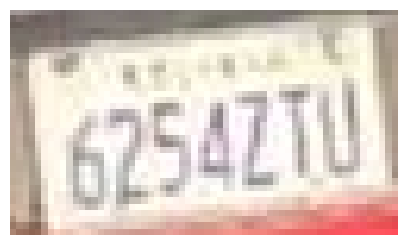

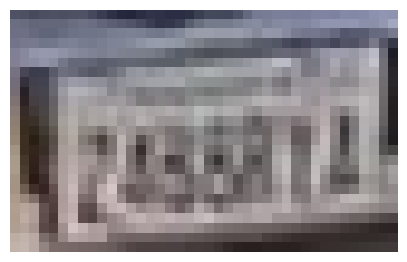


0: 320x640 2 Autos, 2 Placas, 42.9ms
Speed: 4.4ms preprocess, 42.9ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)


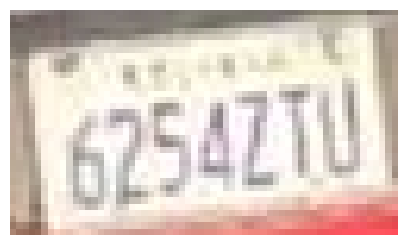

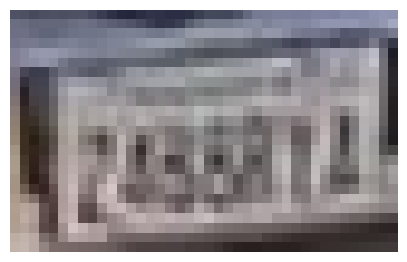

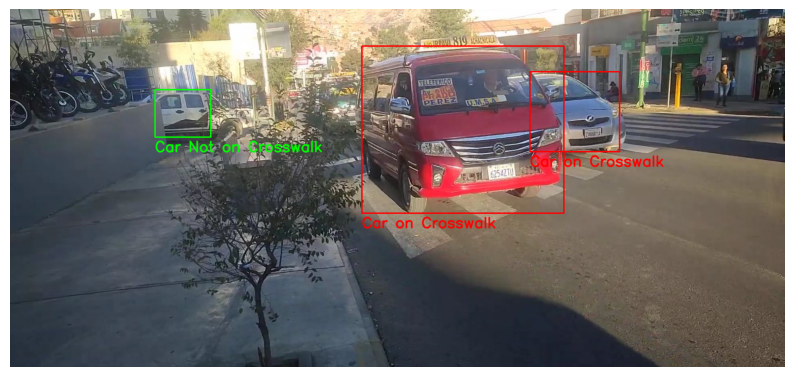

In [45]:
cross_img = cv2.imread(path+'1.jpeg')
display_images(cross_img,1)
results = final_project(cross_img)
cars_on_crosswalk = []
for result in results:
    for box in result.boxes:
        if final_project.names[int(box.cls)] == "Auto":
            car_box = list(map(int, box.xyxy[0]))
            if is_car_on_crosswalk(car_box, crosswalk):
                color = (0, 0, 255)
                text = "Car on Crosswalk"
                cars_on_crosswalk.append(car_box)
            else:
                color = (0, 255, 0) 
                text = "Car Not on Crosswalk"
            x1, y1, x2, y2 = car_box
            cv2.rectangle(cross_img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(cross_img, text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
for car_box in cars_on_crosswalk:
    results = final_project(cross_img)
    plate_rois, plate_coords = extract_rois(results, target_label="Placa")
    for roi in plate_rois:
        plt.figure(figsize=(5, 5))
        plt.imshow(roi)
        plt.axis('off')
        plt.show()

cross_img_rgb = cv2.cvtColor(cross_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(cross_img_rgb)
plt.axis('off')
plt.show()

The Algorithm and model work properly, however it suffers a lot from bad image quality, on the other hand on our experiment trying to enhance the palte image only led to worse inferrence metrics using easyocr, future work could involve improivng this inferrence metric using tesseract of some other type of text extraction or exploring better image enhancing algorithms to improve the algorithms performance